# Latent Space Insights
---
This notebook explores some of the key properties of the Latent Space in the HighDimSynthesizer.

#### Experiment Parameters
- (x1) datasets
    - credit
- (x1) num_rows
    - 100_000
- (x5) % 'bad' data
    - 1, 2, 4, 8, 16
- (x10) trials

In [19]:
import os
import warnings
from typing import List
import logging
import json

warnings.filterwarnings(action='ignore', module='numpy')
warnings.filterwarnings(action='ignore', module='pandas')
warnings.filterwarnings(action='ignore', module='sklearn')
warnings.filterwarnings(action='ignore', module='tensorflow')

import random as rd
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from synthesized import HighDimSynthesizer
from synthesized.common import ValueFactory
from synthesized.insight.latent import latent_dimension_usage, total_latent_space_usage, get_latent_space
from synthesized.insight.dataset import describe_dataset_values, describe_dataset, classification_score
from synthesized.testing.utility import UtilityTesting


if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(os.path.split(workbookDir)[0])[0])

pd.options.display.max_rows = 1500

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Datasets - Credit Scoring
---



In [2]:
credit = pd.read_csv('data/templates/credit.csv').dropna()

In [3]:
synth = HighDimSynthesizer(credit)

2020-04-16 16:22:13,229 :: INFO :: LearningManager :: check_frequency updated to 125


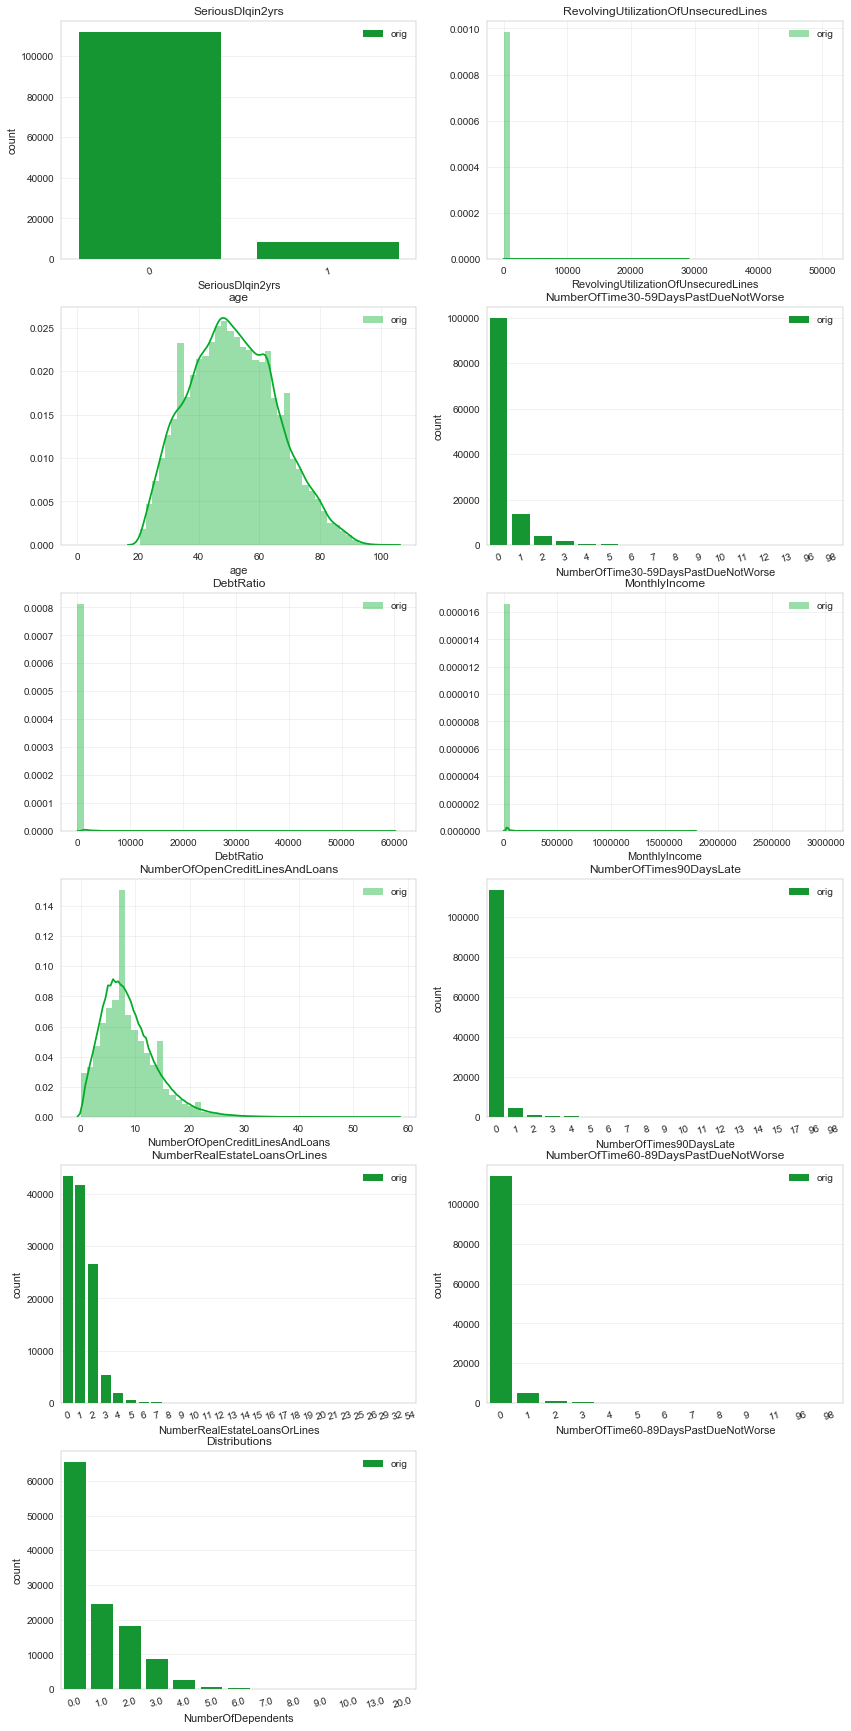

In [4]:
ut = UtilityTesting(synth, credit)
ut.show_distributions()

In [17]:
def create_bad_data(df: pd.DataFrame, n: int):
    bad_dict = {}
    for col in df.columns:
        bad_dict[col] = df[col].sample(n).reset_index(drop=True)
    return pd.DataFrame(bad_dict)

def corrupt_data(df: pd.DataFrame, percent: float):
    size = len(df)
    bad_size = int(percent*size)
    bad_df = create_bad_data(df, bad_size)
    good_df = df.sample(size-bad_size).reset_index(drop=True)
    
    return pd.concat((good_df, bad_df), axis=0, sort=False).sample(size, replace=False).reset_index(drop=True)
    

In [18]:
corrupt_data(credit, 0.05)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                      0                              0.459495   62   
1                      0                              0.006430   43   
2                      0                              0.574967   43   
3                      0                              0.013468   46   
4                      0                              0.712204   52   
...                  ...                                   ...  ...   
120264                 0                              0.000000   75   
120265                 0                              0.032668   59   
120266                 0                              0.043215   80   
120267                 0                              0.028918   39   
120268                 0                              0.223442   39   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                          0   0.306891        12000.0   
1                                          0   0.211398         5193.0   
2                                          1   1.150631         6100.0   
3                                          0   0.008142         1350.0   
4                                          1   0.210376        35350.0   
...                                      ...        ...            ...   
120264                                     0   0.044472        10500.0   
120265                                     0   0.203059         3333.0   
120266                                     0   0.228462         4166.0   
120267                                     0   0.003871         5683.0   
120268                                     0   0.237441         2766.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    16                        0   
1                                     7                        0   
2                                    20                        0   
3                                     3                        0   
4                                    17                        0   
...                                 ...                      ...   
120264                                3                        0   
120265                               18                        0   
120266                                7                        0   
120267                                2                        0   
120268                                6                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  2                                     0   
1                                  0                                     0   
2                                  2                                     0   
3                                  0                                     0   
4                                  2                                     0   
...                              ...                                   ...   
120264                             1                                     0   
120265                             1                                     0   
120266                             2                                     0   
120267                             0                                     0   
120268                             0                                     0   

        NumberOfDependents  
0                      1.0  
1                      1.0  
2                      3.0  
3                      1.0  
4                      3.0  
...                    ...  
120264                 0.0  
120265                 1.0  
120266                 0.0  
120267                 1.0  
120268                 4.0  

[120269 rows x 11 columns]

In [39]:
results = json.load(open('docs/latent_space/latent_insights_results.json', 'r'))

In [40]:
df_bad = pd.DataFrame(results['bad_data_exp2'])
df_bad

dim_0  dim_1  dim_2  dim_3  dim_4  dim_5  dim_6  dim_7  dim_8  dim_9  \
0    1.001  0.986  0.978  0.956  0.912  0.908  0.882  0.828  0.801  0.801   
1    0.823  0.745  0.732  0.670  0.608  0.591  0.555  0.426  0.421  0.415   
2    0.984  0.967  0.955  0.954  0.944  0.939  0.933  0.915  0.875  0.858   
3    0.733  0.719  0.683  0.678  0.667  0.665  0.646  0.597  0.485  0.478   
4    1.000  0.974  0.961  0.959  0.951  0.948  0.942  0.935  0.927  0.795   
5    0.758  0.737  0.708  0.682  0.681  0.671  0.656  0.648  0.609  0.490   
6    0.996  0.966  0.965  0.958  0.934  0.929  0.917  0.878  0.826  0.789   
7    0.787  0.739  0.658  0.656  0.654  0.644  0.556  0.545  0.459  0.451   
8    1.012  0.973  0.971  0.933  0.932  0.910  0.880  0.858  0.837  0.767   
9    0.771  0.759  0.694  0.665  0.650  0.595  0.536  0.520  0.487  0.396   
10   0.997  0.995  0.985  0.948  0.928  0.927  0.923  0.780  0.762  0.718   
11   0.819  0.757  0.707  0.676  0.626  0.596  0.585  0.445  0.345  0.305   
12   0.995  0.982  0.979  0.954  0.928  0.922  0.868  0.853  0.817  0.684   
13   0.775  0.750  0.743  0.681  0.666  0.593  0.529  0.494  0.391  0.347   
14   0.983  0.980  0.971  0.967  0.961  0.956  0.936  0.920  0.901  0.691   
15   0.787  0.733  0.717  0.704  0.699  0.677  0.642  0.638  0.544  0.273   
16   0.984  0.978  0.973  0.961  0.938  0.930  0.916  0.905  0.862  0.850   
17   0.756  0.747  0.723  0.712  0.664  0.657  0.631  0.607  0.528  0.525   
18   0.992  0.985  0.959  0.951  0.948  0.938  0.930  0.926  0.903  0.822   
19   0.806  0.706  0.696  0.691  0.690  0.656  0.627  0.607  0.547  0.529   
20   0.982  0.974  0.964  0.958  0.940  0.931  0.917  0.853  0.817  0.760   
21   0.802  0.766  0.698  0.696  0.651  0.631  0.560  0.520  0.459  0.367   
22   0.986  0.979  0.977  0.959  0.946  0.934  0.931  0.925  0.889  0.881   
23   0.740  0.695  0.695  0.678  0.669  0.658  0.624  0.607  0.586  0.537   
24   0.997  0.996  0.986  0.981  0.928  0.899  0.870  0.862  0.835  0.798   
25   0.765  0.733  0.725  0.704  0.673  0.606  0.549  0.537  0.529  0.430   
26   1.007  0.987  0.953  0.926  0.925  0.923  0.913  0.912  0.873  0.768   
27   0.798  0.749  0.673  0.637  0.624  0.565  0.547  0.544  0.540  0.388   
28   1.006  1.003  0.970  0.970  0.923  0.894  0.855  0.845  0.785  0.735   
29   0.838  0.805  0.791  0.640  0.610  0.544  0.519  0.483  0.442  0.376   
30   0.978  0.970  0.959  0.951  0.947  0.942  0.927  0.923  0.918  0.786   
31   0.740  0.716  0.716  0.659  0.656  0.646  0.602  0.591  0.546  0.434   
32   0.994  0.976  0.960  0.954  0.940  0.929  0.926  0.912  0.907  0.835   
33   0.782  0.721  0.717  0.713  0.642  0.621  0.593  0.568  0.559  0.473   
34   1.021  0.968  0.959  0.953  0.938  0.928  0.918  0.879  0.787  0.770   
35   0.805  0.736  0.730  0.694  0.628  0.607  0.584  0.551  0.440  0.429   
36   1.025  0.973  0.964  0.916  0.914  0.911  0.891  0.883  0.842  0.841   
37   0.822  0.735  0.734  0.597  0.593  0.590  0.549  0.547  0.541  0.457   
38   1.031  0.997  0.958  0.957  0.946  0.943  0.917  0.916  0.803  0.803   
39   0.816  0.766  0.714  0.671  0.644  0.611  0.608  0.590  0.435  0.387   
40   0.980  0.973  0.970  0.959  0.933  0.928  0.895  0.892  0.845  0.783   
41   0.779  0.766  0.741  0.737  0.617  0.604  0.592  0.591  0.465  0.379   
42   0.979  0.967  0.964  0.957  0.957  0.951  0.950  0.940  0.895  0.763   
43   0.731  0.722  0.719  0.694  0.685  0.667  0.637  0.617  0.569  0.374   
44   0.996  0.968  0.949  0.939  0.927  0.914  0.897  0.879  0.792  0.785   
45   0.782  0.738  0.700  0.681  0.625  0.570  0.543  0.447  0.428  0.416   
46   0.993  0.972  0.954  0.933  0.932  0.927  0.908  0.824  0.821  0.790   
47   0.814  0.738  0.685  0.685  0.684  0.650  0.636  0.437  0.405  0.391   
48   1.013  0.980  0.975  0.950  0.934  0.925  0.925  0.910  0.850  0.843   
49   0.786  0.730  0.718  0.675  0.637  0.607  0.602  0.574  0.486  0.459   
50   0.992  0.973  0.949  0.947  0.920  0.911  0.906  0.904  0.865  0.827   
5

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-32F3-2DF3-5D2D-F331
Expires at: 2020-06-01 00:00:00


/Users/simonhkswan/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


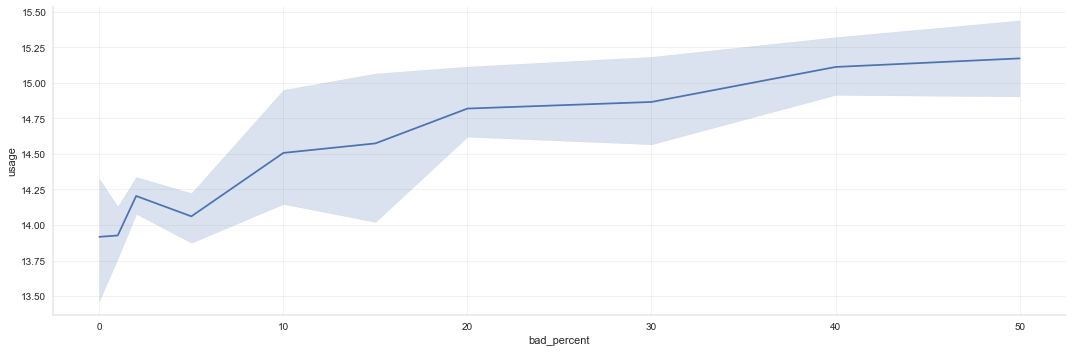

In [50]:
df = df_bad.rename(columns=lambda x: x[4:] if 'dim_' in x else x).melt(id_vars=['trial', 'usage_type', 'bad_percent', 'num_rows', 'beta', 'num_iterations'], value_name='usage', var_name='dim')
df = df[df['dim']=='total'][df['bad_percent']<60]
# df['dim'] = df['dim'].astype(np.int32)


colors = ["coral", "ocean blue", "ocean blue", "ocean blue"]*8
sns.relplot(data=df[df['usage_type']=='mean'], kind='line', y='usage', 
            x='bad_percent', palette=sns.xkcd_palette(colors), aspect=3)

# sns.relplot(data=df_ldu, kind='line', hue='index', y='usage', 
#             col='usage_type', x='scenario', palette=sns.xkcd_palette(colors))

/Users/simonhkswan/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


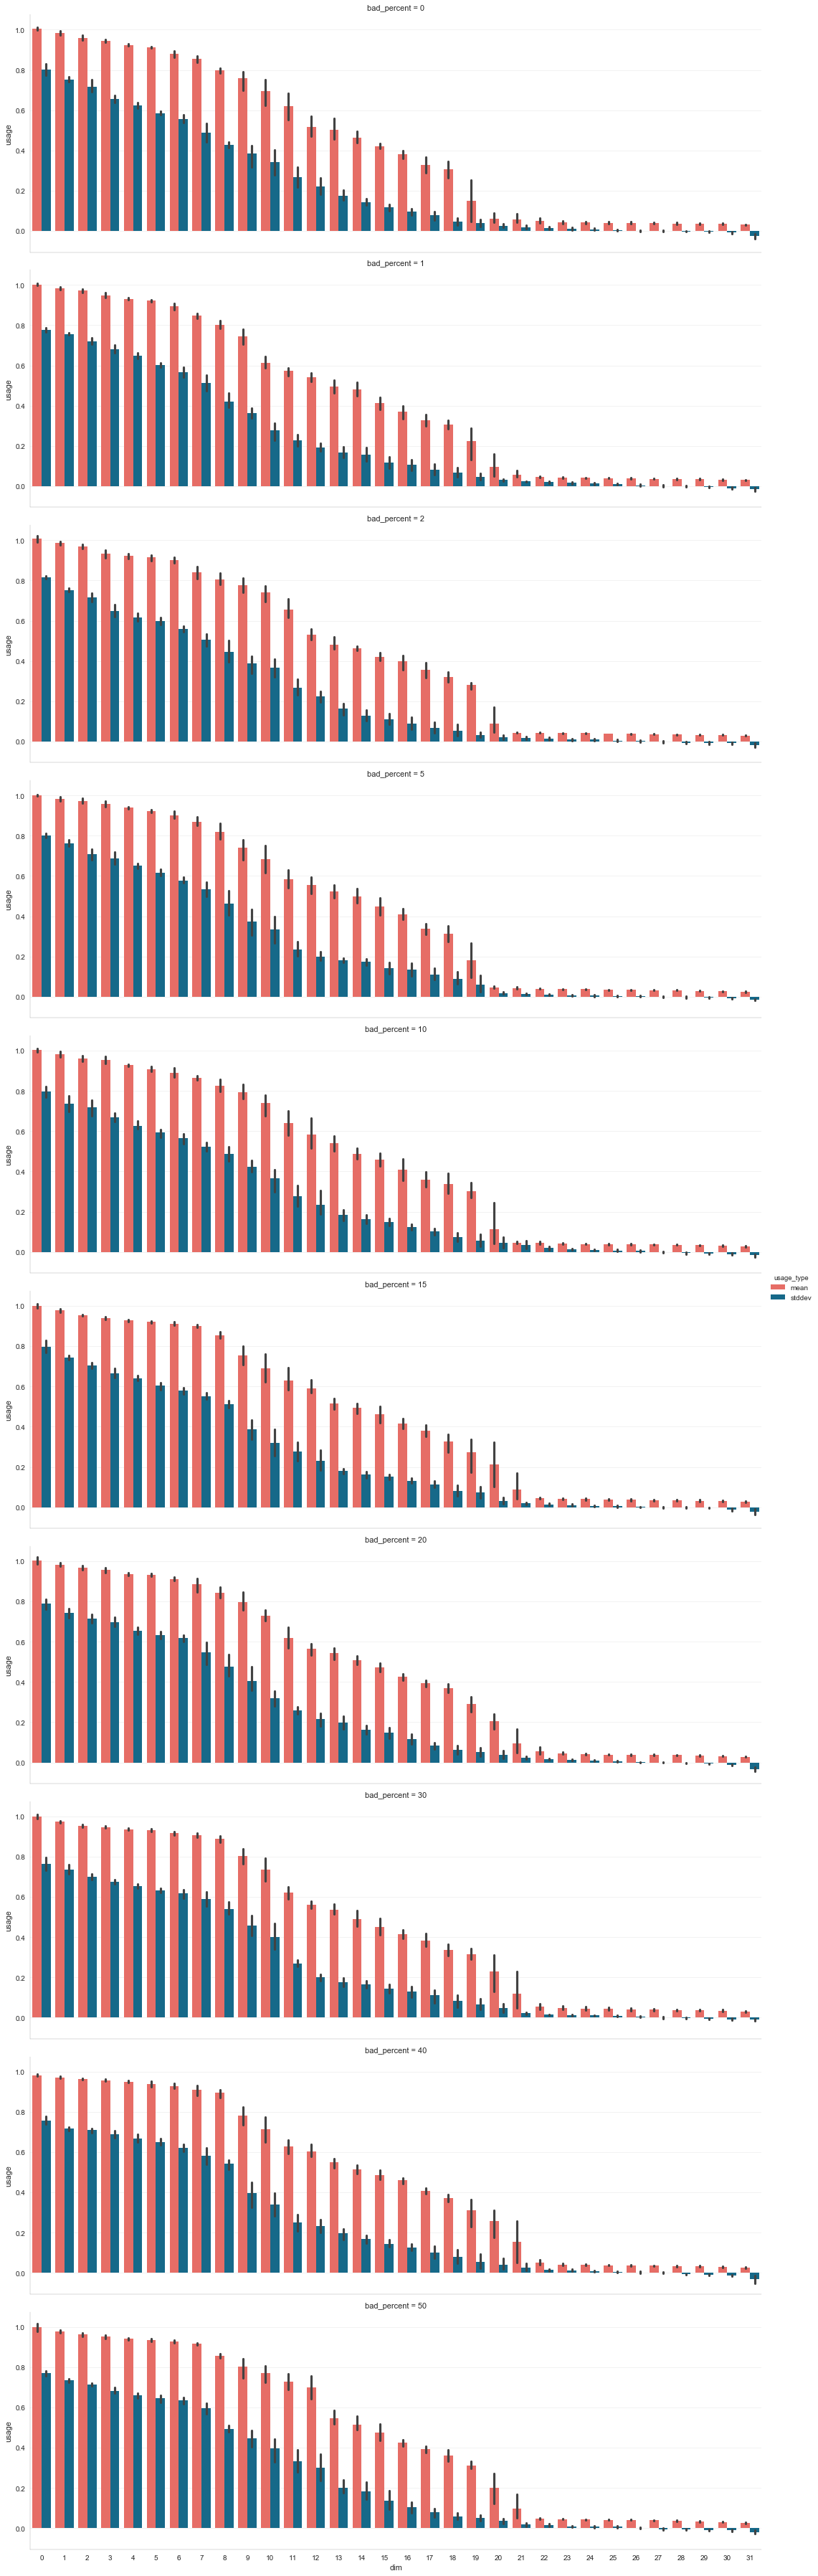

In [51]:
df = df_bad.rename(columns=lambda x: x[4:] if 'dim_' in x else x).melt(id_vars=['trial', 'usage_type', 'bad_percent', 'num_rows', 'beta', 'num_iterations'], value_name='usage', var_name='dim')
df = df[df['dim']!='total'][df['bad_percent']<60]
df['dim'] = df['dim'].astype(np.int32)

colors = ["coral", "ocean blue", "ocean blue", "ocean blue"]*8
sns.catplot(data=df, kind='bar', y='usage', x='dim', hue='usage_type',
            row='bad_percent', palette=sns.xkcd_palette(colors[:2]), aspect=3)

In [115]:
# train, test = train_test_split(credit.dropna(), test_size=0.2)
# classification_score(df_train=train, df_test=test, label='SeriousDlqin2yrs', model='all')

In [172]:
from synthesized.common.values import ContinuousValue, CategoricalValue

def latent_dimension_usage_by_value(df_latent: pd.DataFrame, df_original: pd.DataFrame) -> pd.DataFrame:

    ls_m = df_latent.filter(like='m', axis='columns')
    n_dims = len(ls_m.columns)
    vf = ValueFactory(df=df_original)
    df_o = vf.preprocess(df_original)
    
    df_full = pd.concat((df_o, ls_m), axis='columns')

    df_corr = pd.DataFrame()
    for value in vf.get_values():
        if isinstance(value, ContinuousValue):
            val = df_o[value.name]
            df_corr[value.name] = ls_m.corrwith(val, method='spearman')
        elif isinstance(value, CategoricalValue):
            value_corr = pd.Series(np.zeros(shape=(n_dims,)), name=value.name)
            for dim in range(n_dims):
                order = df_full.filter(regex=r'm_|'+value.name).groupby(value.name).mean().sort_values(f'm_{dim}').index.to_numpy()
                rank_map = {v: n for n, v in enumerate(order)}
                value_corr[dim] = pd.DataFrame(df_full[value.name].map(rank_map)).corrwith(df_full.loc[:,f'm_{dim}'], method='spearman')
            value_corr.index = [f'm_{dim}' for dim in range(n_dims)]
            df_corr[value.name] = value_corr
            
    
    df_corr = df_corr.set_index(pd.Index(np.arange(len(df_corr)), 'dimension'))
    return df_corr

In [117]:
ldvu = latent_dimension_usage_by_value(ls, credit)

In [142]:
ldvu.reindex(sig_dims)
# sns.clustermap(ldvu.reindex(sig_dims))
# sns.clustermap(credit.corr(method='spearman'))

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  \
25          0.199531                              0.063533 -0.040977   
26          0.145788                             -0.229817  0.211038   
5           0.105246                              0.167956 -0.347241   
19          0.057769                             -0.109984 -0.015802   
29          0.076893                              0.167244 -0.400696   
0           0.223993                              0.004407  0.029836   
6           0.191576                              0.061025 -0.232824   
7           0.147142                              0.107538 -0.424307   
31          0.162529                             -0.069310 -0.148382   
9           0.423970                             -0.213693  0.218731   

    NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
25                              0.247230  -0.064734   
26                              0.110294  -0.519776   
5                               0.161210   0.048799   
19                              0.209150   0.072253   
29                              0.118914  -0.033090   
0                               0.092051  -0.082730   
6                               0.158697  -0.300841   
7                               0.263204  -0.083362   
31                              0.597308   0.281520   
9                               0.414202  -0.142507   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
25                         0.108398                 0.113863   
26                         0.345776                 0.160397   
5                          0.244315                 0.053854   
19                         0.110271                 0.215779   
29                        -0.237037                 0.290636   
0                         -0.573689                 0.191940   
6                         -0.174974                 0.126637   
7                          0.040643                 0.251383   
31                         0.256981                 0.103057   
9                          0.257403                 0.057689   

    NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
25                      0.366173                              0.273513   
26                      0.345651                              0.121737   
5                       0.117403                              0.058580   
19                      0.599835                              0.166001   
29                      0.389207                              0.260891   
0                       0.378299                              0.219670   
6                       0.326767                              0.202234   
7                       0.359959                              0.171432   
31                      0.355453                              0.100655   
9                      -0.008778                              0.055013   

    NumberOfDependents  
25            0.385643  
26            0.244426  
5             0.555709  
19            0.265654  
29            0.379549  
0             0.312628  
6             0.306048  
7             0.373457  
31            0.281864  
9             0.225879

In [10]:
from sklearn.manifold import TSNE
from synthesized.common import ValueFactory

In [11]:
clf = TSNE()
tsne_ls = clf.fit_transform(X=ls_circle.loc[:,[f'm_{n}' for n in [1, 10, 11, 9, 0, 14]]].to_numpy()[:15000, :])

In [19]:
plot_data = ValueFactory(df=credit).preprocess(credit.iloc[:15000,:].copy())
ls_sig = ls_circle.loc[:,[f'm_{n}' for n in [1, 10, 11, 9, 0, 14]]].to_numpy()[:15000, :]
plot_data['t1'] = ls_sig[:, 4]
plot_data['t2'] = ls_sig[:, 5]

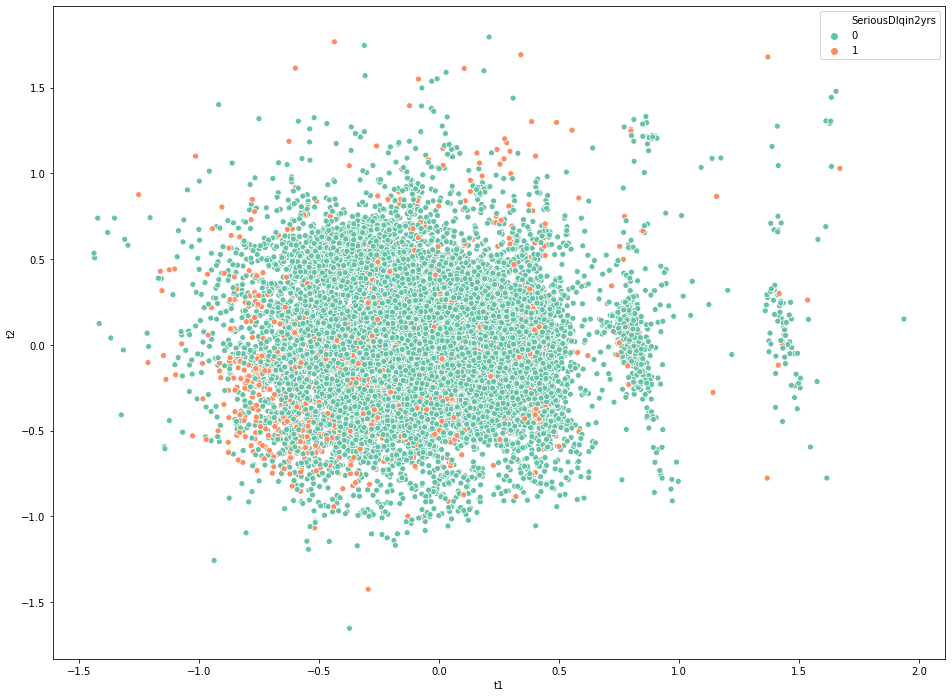

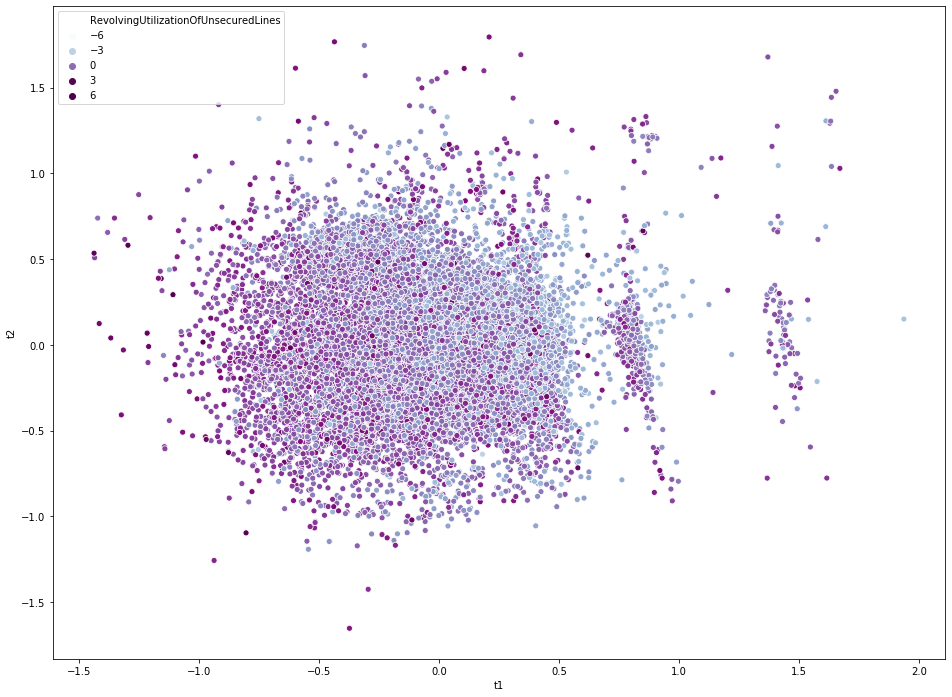

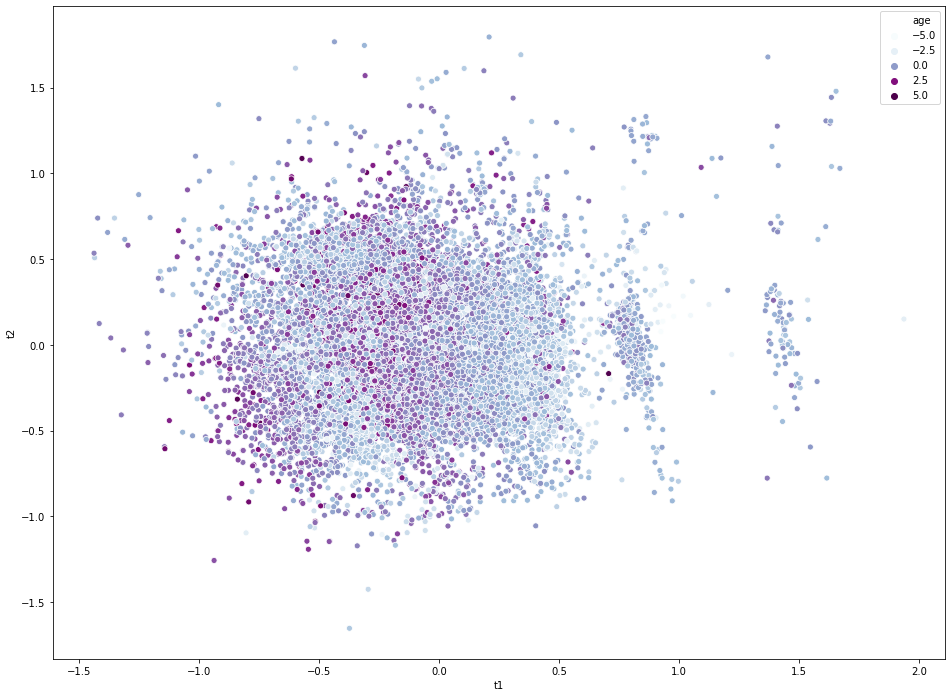

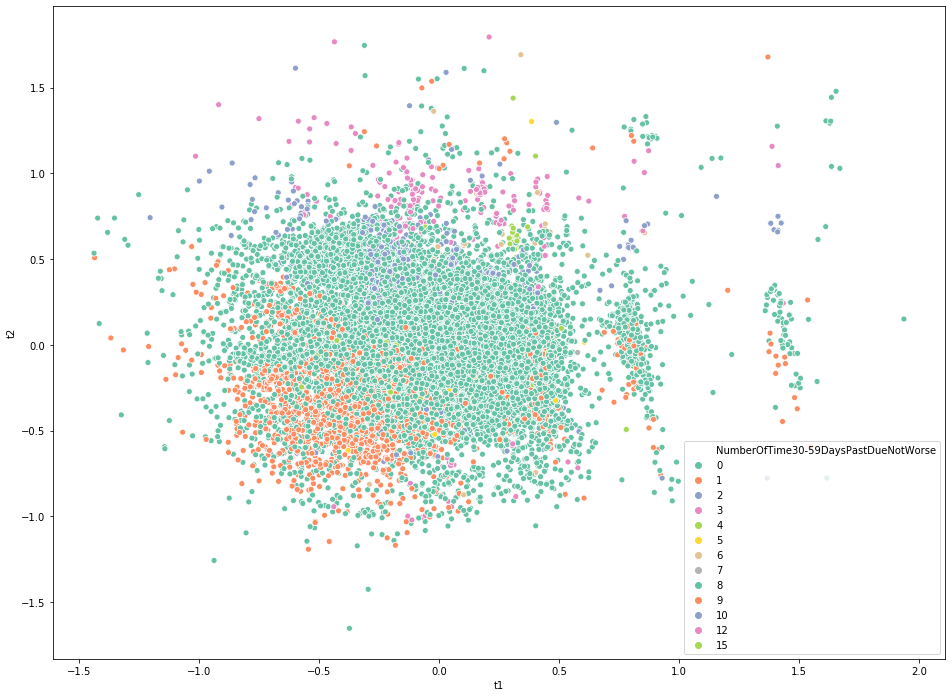

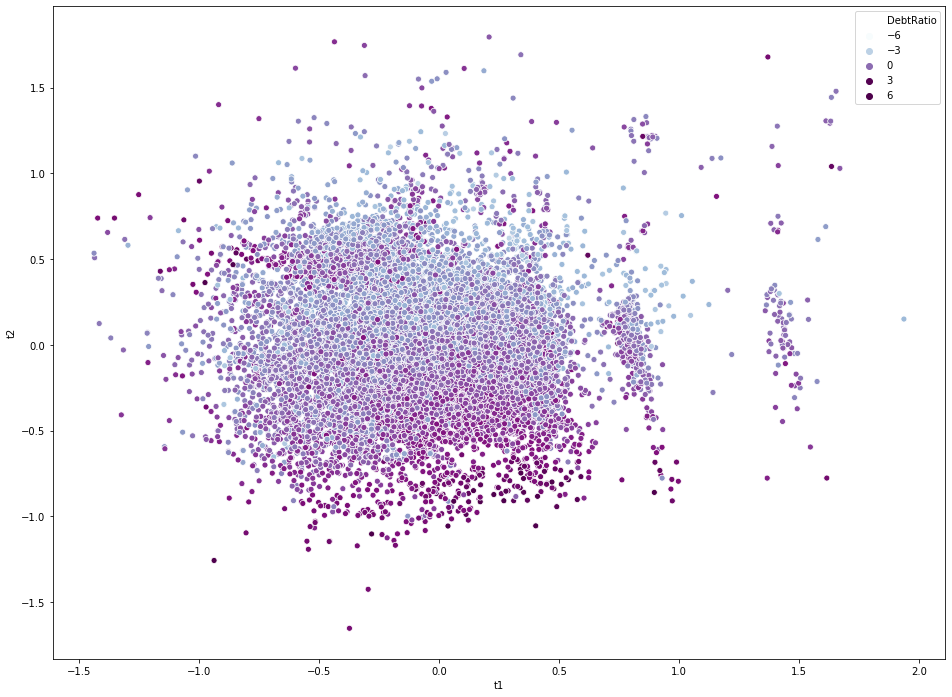

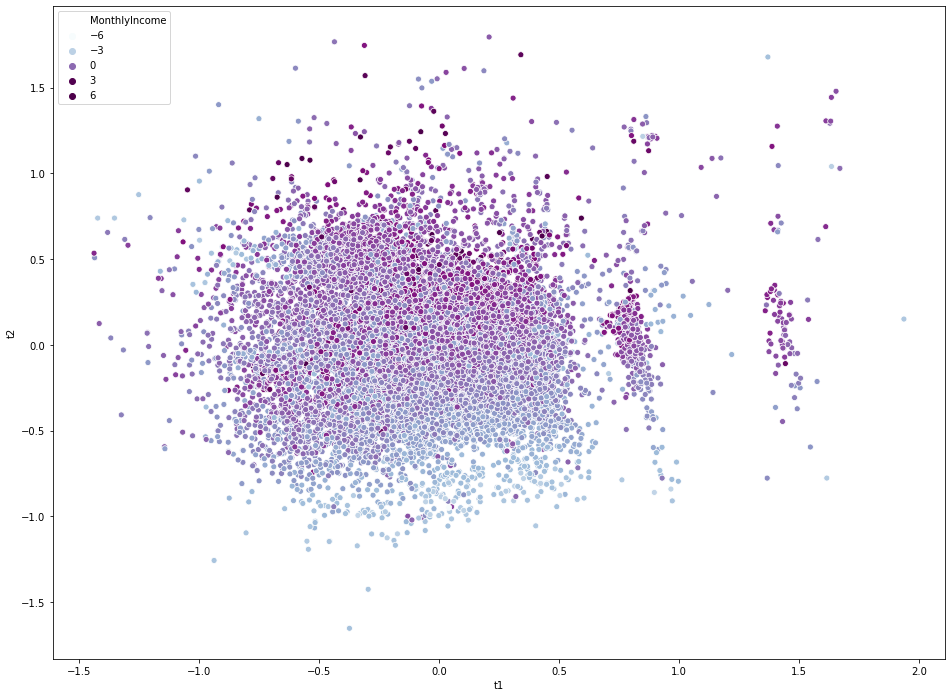

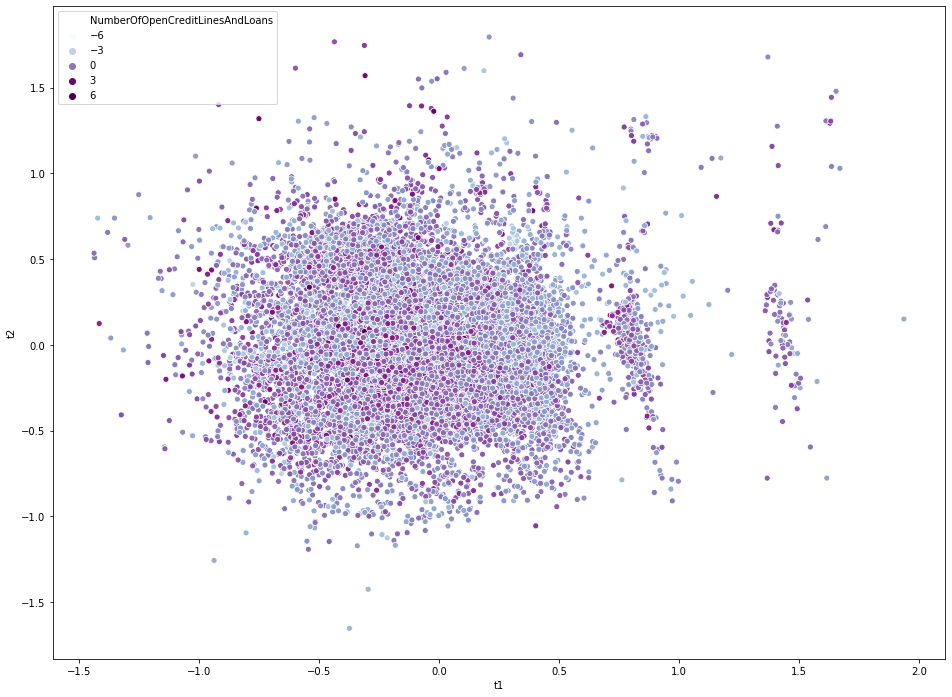

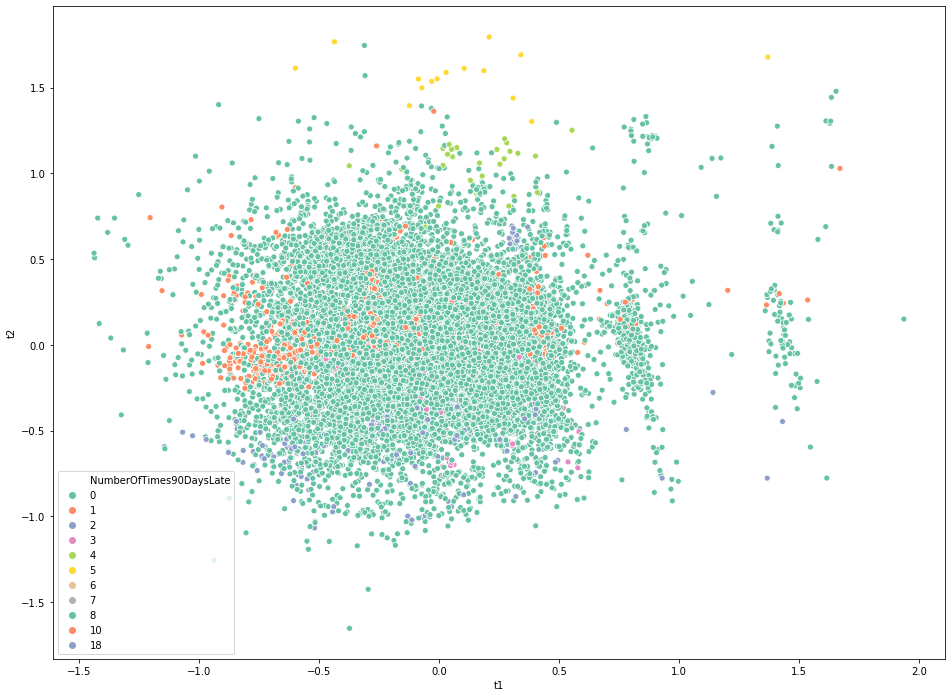

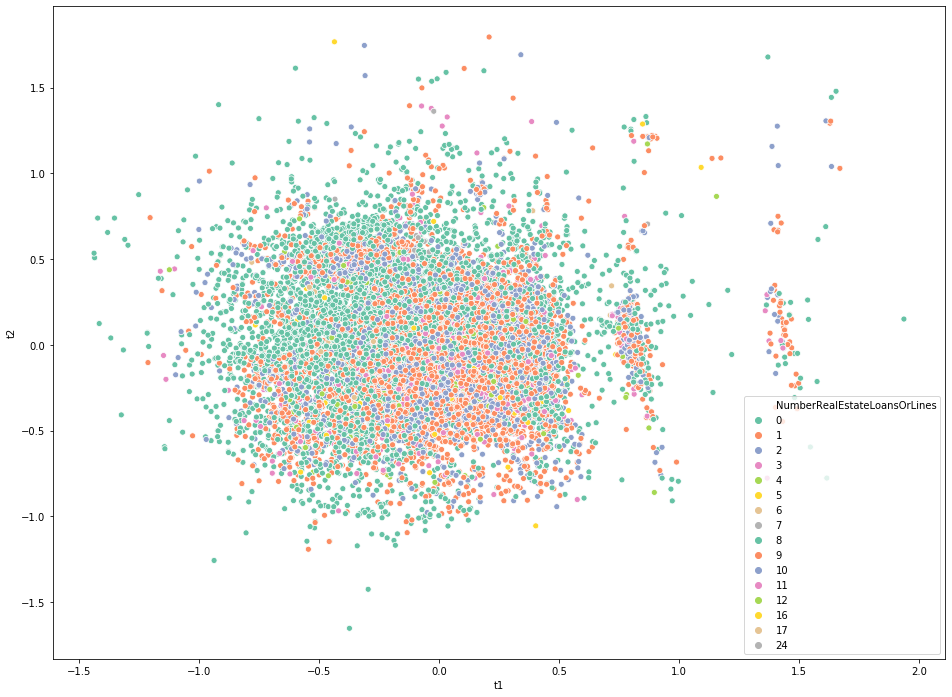

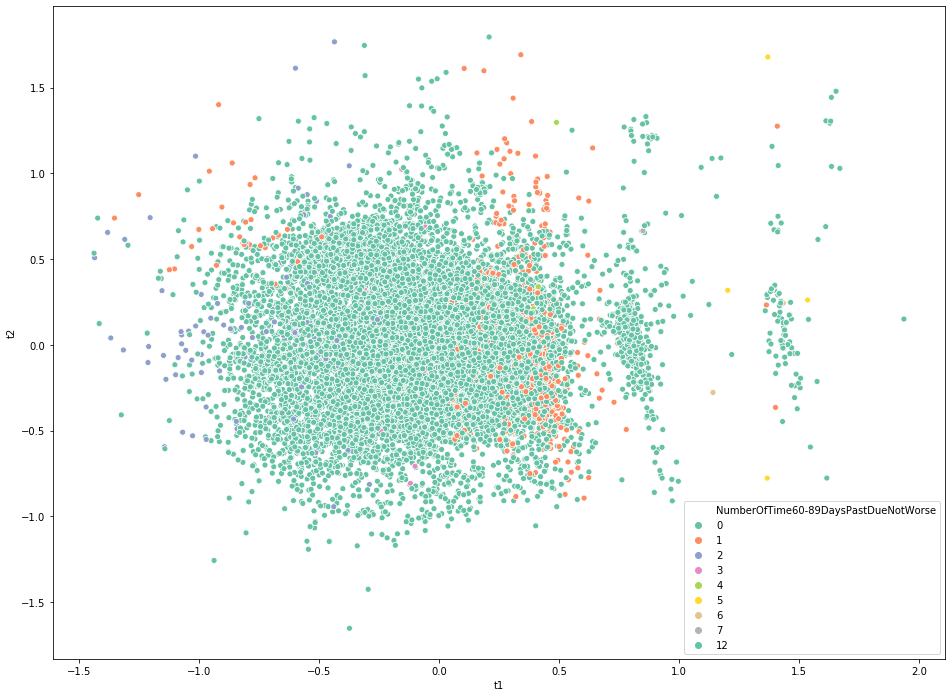

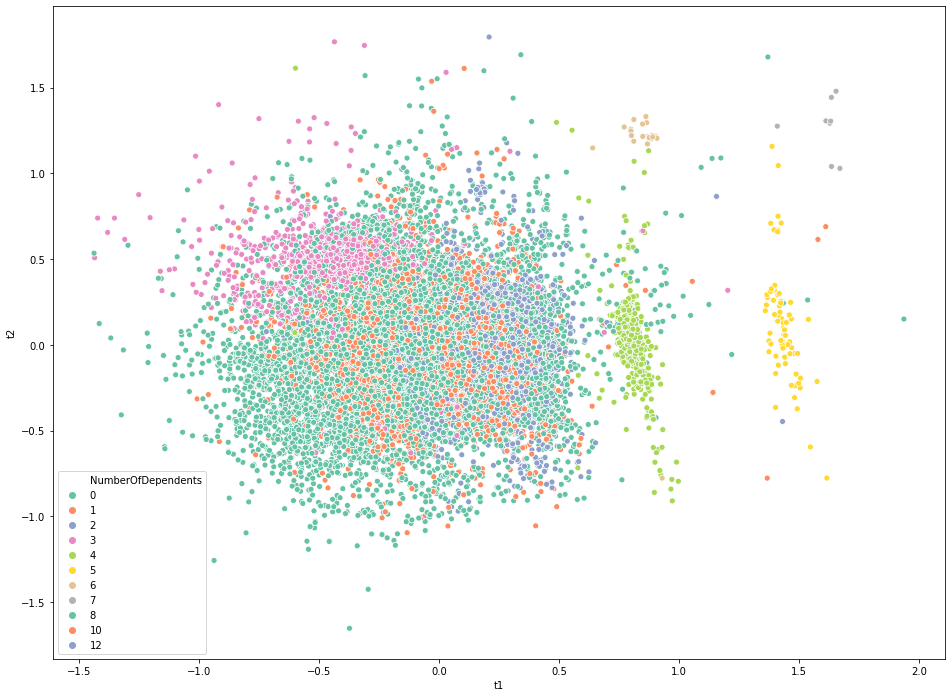

In [20]:
for name in credit.columns:
    fig = plt.figure(figsize=(16,12))
    ax = fig.gca()
    if credit[name].nunique() < 30:
        palette = 'Set2'
    else:
        palette = 'BuPu'
    sns.scatterplot(data=plot_data, axes=ax, x='t1', y='t2', hue=name, palette=palette)

In [2]:
x = [100.0*np.sin(i)+rd.random() for i in np.arange(0, 3.14159, 0.001)]
y = [100.0*np.cos(i)+rd.random() for i in np.arange(0, 3.14159, 0.001)]
z = [100*rd.random() for i in np.arange(0, 3.14159, 0.001)]

df_circle = pd.DataFrame(dict(x=x,y=y,z=z))

In [3]:
df_circle.corr()

x         y         z
x  1.000000 -0.000612 -0.036795
y -0.000612  1.000000 -0.012806
z -0.036795 -0.012806  1.000000

In [4]:
ls_circle = get_latent_space(
    df_circle, num_iterations=10000, beta=5.0, 
    summarizer_dir='/Users/simonhkswan/Desktop/latent_exploration')

NameError: name 'df_circle' is not defined

In [3]:
ls_circle = get_latent_space(
    credit, num_iterations=20000, beta=5.0, latent_size=32,
    summarizer_dir='/Users/simonhkswan/Desktop/latent_exploration')

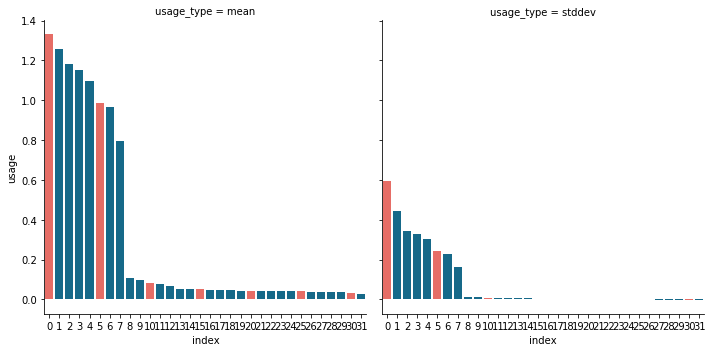

In [4]:
ldus = []

for ut in ['mean', 'stddev']:
    ldu = latent_dimension_usage(df_latent=ls_circle, usage_type=ut)
    ldu = ldu.sort_values(by='usage', ascending=False).reset_index(drop=True).reset_index()
    ldu['usage_type'] = ut
    ldus.append(ldu)
    

df_ldu = pd.concat(ldus, axis=0)

colors = ["coral", "ocean blue", "ocean blue", "ocean blue",  "ocean blue"]
sns.catplot(data=df_ldu, kind='bar', x='index', y='usage', 
            col='usage_type', palette=sns.xkcd_palette(colors))



In [5]:
df_plot = pd.concat((credit, ls_circle), axis=1)
latent_dimension_usage(ls_circle, usage_type='mean')



dimension  usage
0          28  0.029
1          17  0.032
2          26  0.035
3           0  0.036
4          13  0.036
5          14  0.037
6           2  0.041
7          27  0.041
8           4  0.041
9          20  0.041
10         19  0.042
11         22  0.043
12         31  0.045
13         23  0.047
14         18  0.048
15         11  0.050
16          6  0.054
17         12  0.055
18          1  0.055
19         25  0.067
20         16  0.076
21          8  0.083
22         30  0.098
23         15  0.108
24         29  0.796
25         24  0.966
26          3  0.985
27         10  1.099
28         21  1.151
29          5  1.182
30          9  1.255
31          7  1.334

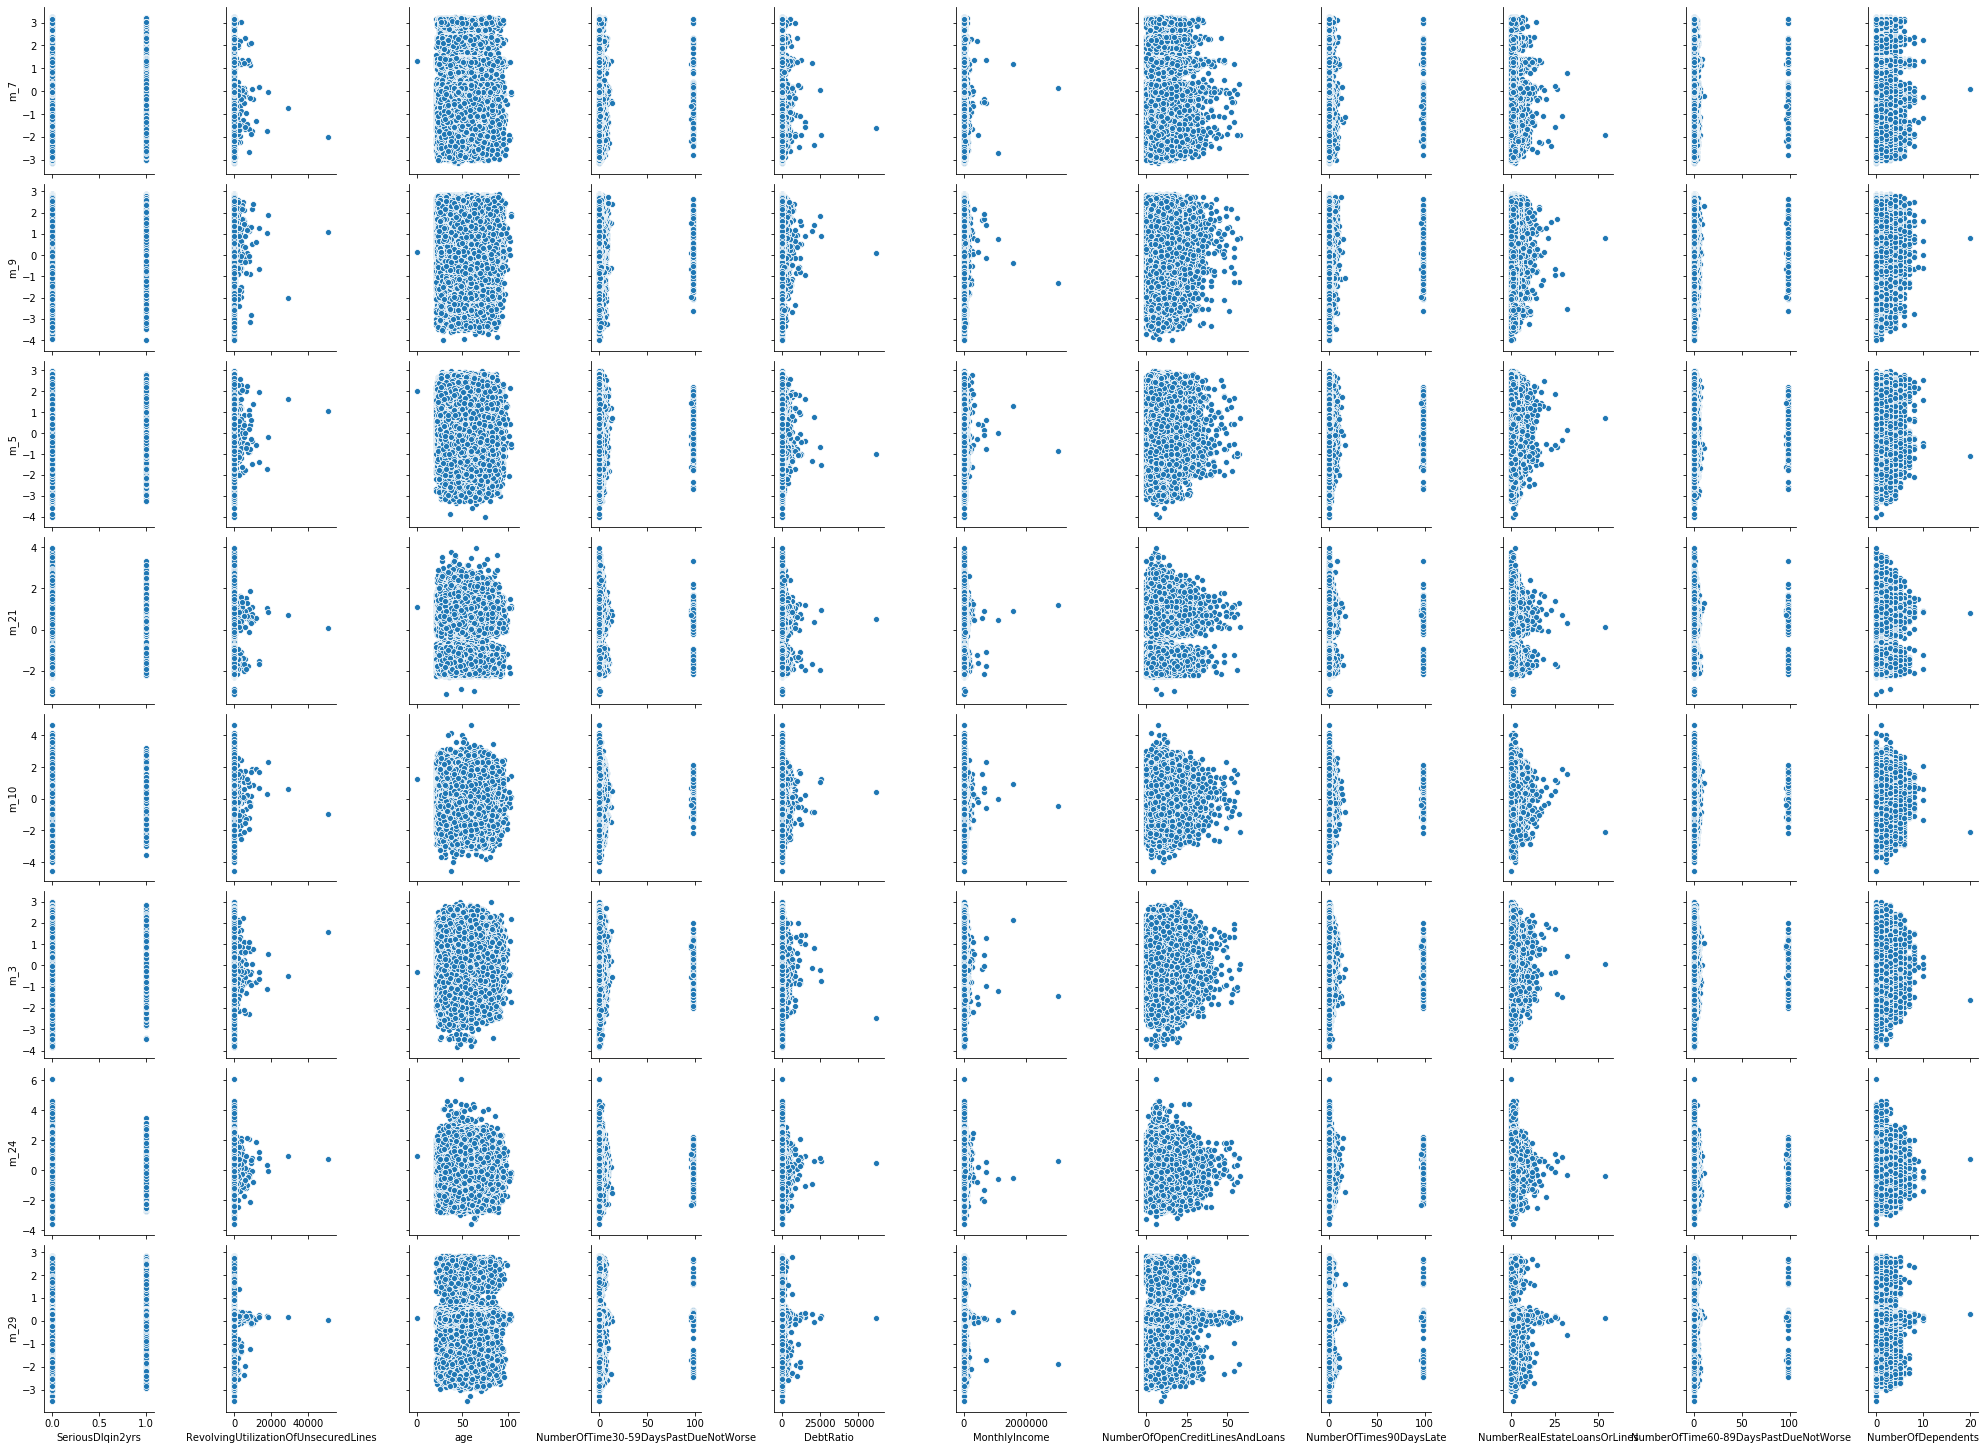

In [6]:
sns.pairplot(data=df_plot, x_vars=credit.columns[:], y_vars=[f'm_{n}' for n in [7,9,5,21,10,3,24,29]])